In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sb

In [5]:
df = pd.read_csv("datasets/SVMtrain.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [9]:
# Check and represent the data

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [34]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [21]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [32]:
df = df.drop("PassengerId", axis=1)

In [ ]:
# Change sex: Male - 1, female - 0

In [14]:
df["Sex"].unique()

array(['Male', 'female'], dtype=object)

In [15]:
df["Sex"] = df["Sex"].map({"Male": 1, "female": 0})

In [16]:
df["Sex"].unique()

array([1, 0], dtype=int64)

In [17]:
# Graph data and find correlation between data and "Survived"

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

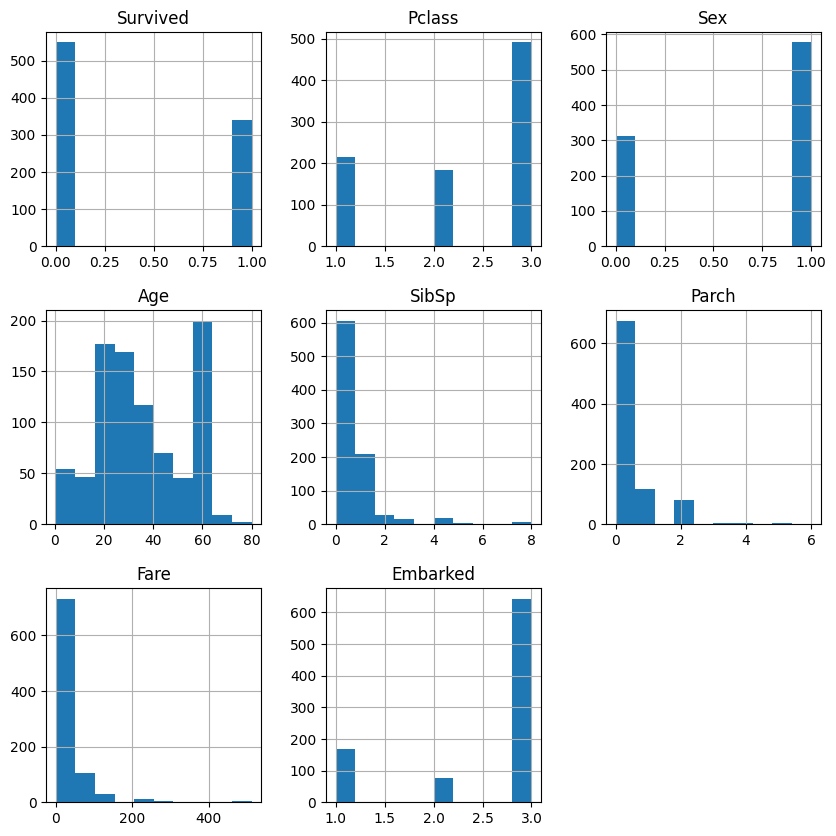

In [33]:
df.hist(figsize=(10, 10), bins=10)

In [35]:
correlation_matrix = df.corr()

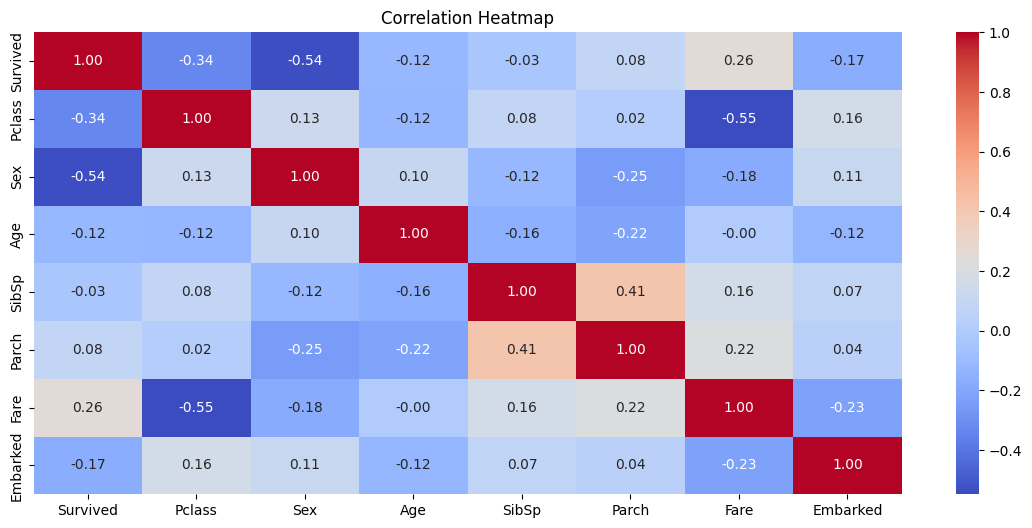

In [38]:
plt.figure(figsize=(14, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [40]:
df.corrwith(df["Survived"]).sort_values(ascending=False)

Survived    1.000000
Fare        0.255290
Parch       0.083151
SibSp      -0.034040
Age        -0.116558
Embarked   -0.169718
Pclass     -0.335549
Sex        -0.541585
dtype: float64

In [41]:
# Import and train models

In [46]:
X, y = df.drop("Survived", axis=1), df["Survived"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [50]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (800, 7)
X_test shape (89, 7)
y_train shape (800,)
y_test shape (89,)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [63]:
pipeline = Pipeline(
    [("scaler", StandardScaler())]
)

In [64]:
rfc = Pipeline(
    [("prepos", pipeline), ("classifier", RandomForestClassifier())]
)

knc = Pipeline(
    [("prepos", pipeline), ("classifier", KNeighborsClassifier())]
)

svc = Pipeline(
    [("prepos", pipeline), ("classifier", SVC())]
)

dtc = Pipeline(
    [("prepos", pipeline), ("classifier", DecisionTreeClassifier())]
)

In [65]:
pipelines = [rfc, knc, svc, dtc]

In [66]:
names = ["RandomForestClassifier", "KNeighborsClassifier", "SVC", "DecisionTreeClassifier"]

In [74]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [68]:
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)

RandomForestClassifier: Score = 0.76, MSE = 0.24 


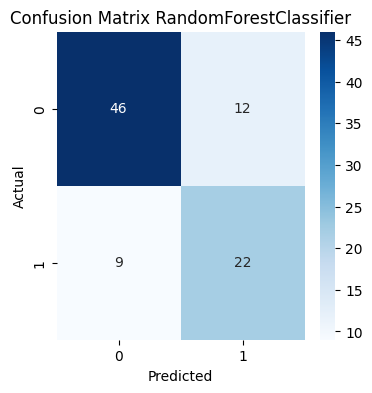

KNeighborsClassifier: Score = 0.82, MSE = 0.18 


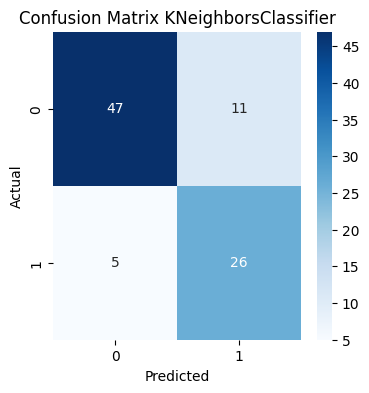

SVC: Score = 0.84, MSE = 0.16 


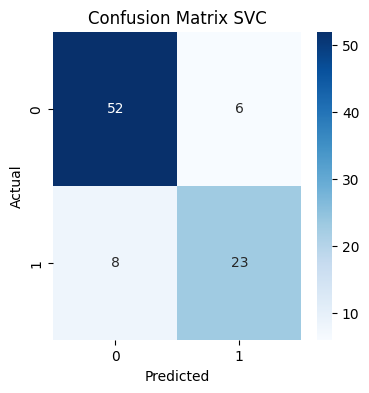

DecisionTreeClassifier: Score = 0.75, MSE = 0.25 


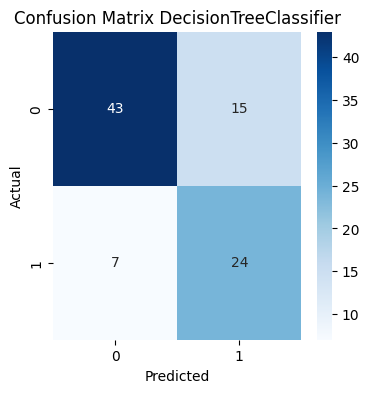

In [86]:
for i, pipeline in enumerate(pipelines):
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    score = pipeline.score(X_test, y_test)
    print(f"{names[i]}: Score = {round(score, 2)}, MSE = {round(mse, 2)} ")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix {names[i]}')
    plt.show()

RandomForestClassifier: Score = 0.81, MSE = 0.19


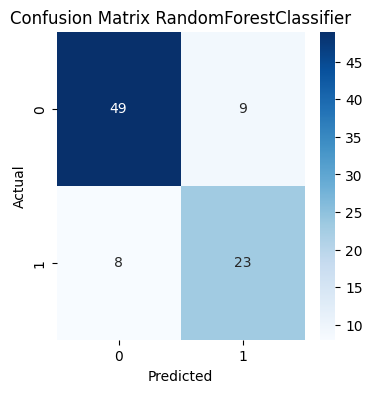

KNeighborsClassifier: Score = 0.83, MSE = 0.17


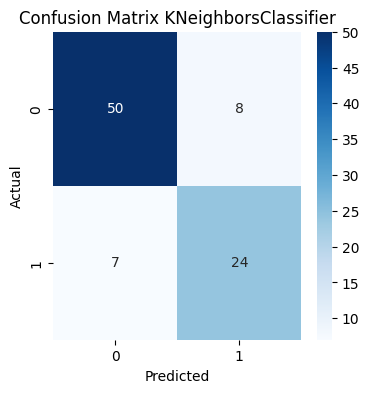

SVC: Score = 0.84, MSE = 0.16


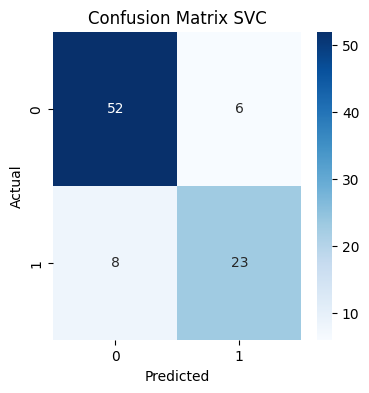

DecisionTreeClassifier: Score = 0.82, MSE = 0.18


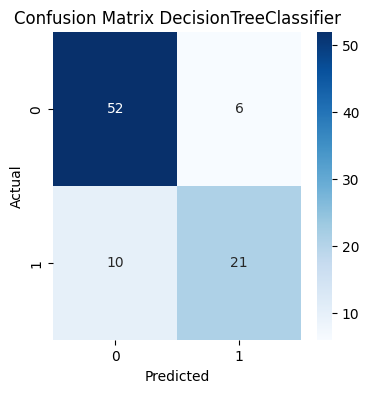

In [85]:
for name, pipeline in zip(names, pipelines):
    param_grid = {}
    if "RandomForestClassifier" in name:
        param_grid = {
            'classifier__n_estimators': [10, 50, 100],
            'classifier__max_depth': [None, 5, 10, 20]
        }
    elif "KNeighborsClassifier" in name:
        param_grid = {
            'classifier__n_neighbors': [3, 5, 10],
            'classifier__weights': ['uniform', 'distance']
        }
    elif "SVC" in name:
        param_grid = {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    elif "DecisionTreeClassifier" in name:
        param_grid = {
            'classifier__max_depth': [None, 5, 10, 20],
            'classifier__min_samples_split': [2, 5, 10]
        }
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    score = grid_search.score(X_test, y_test)
    print(f"{name}: Score = {round(score, 2)}, MSE = {round(mse, 2)}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix {name}")
    plt.show()

In [89]:
# Import keras and train NN

In [90]:
from tensorflow import keras

In [146]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
model = keras.Sequential([
    keras.layers.Input(shape=(7, )),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [148]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [149]:
early_stop = keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")

In [150]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='best_model.keras',
                             monitor='val_accuracy',
                             mode='max',  
                             verbose=1,
                             save_best_only=True)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.1, callbacks=[early_stop, checkpoint])

Epoch 1/50


In [138]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8571 - loss: 0.3840 


In [139]:
print("Loss = ", round(loss,2))
print("Accuracy = ", round(accuracy,2))

Loss =  0.44
Accuracy =  0.83


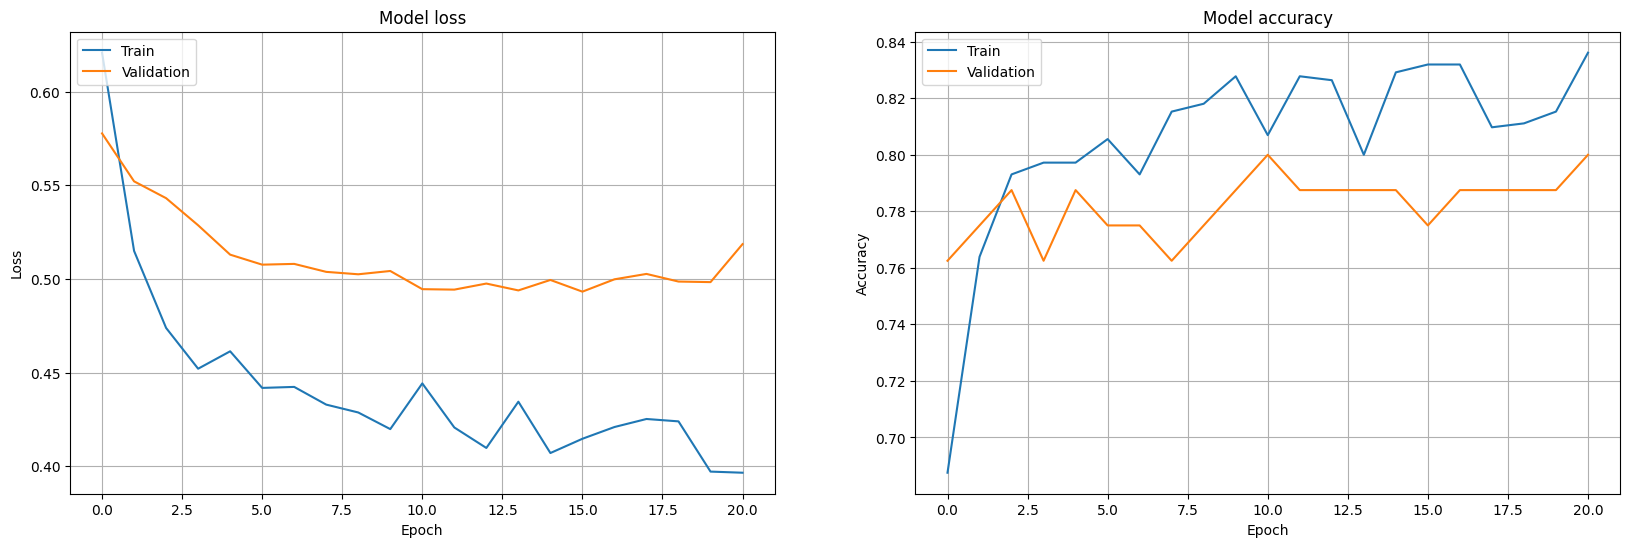

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plot loss
ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Model loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='upper left')
ax[0].grid(True)

# Plot accuracy
ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Model accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='upper left')
ax[1].grid(True)
plt.show()